In [1]:
import sys
sys.path.append('../../..')

import VESIcal as v
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the data
basalts = v.ExcelFile("../../Datasets/cerro_negro.xlsx")

#Calculate the average composition of the entire dataset
columns = list(basalts.data)
avg_vals = []
for col in columns:
    try:
        avg_vals.append(basalts.data[col].mean())
    except:
        avg_vals.append("AVG")

avg_dict = dict(zip(columns, avg_vals))
avg_dict = v.get_oxides(avg_dict)

In [3]:
#Calculate isobars for all samples at 3,000 bars
isobar_list = []
for index, row in basalts.data.iterrows():
    isobar_list.append(v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(samplename=row.name), temperature=1200, pressure_list=[3000], isopleth_list=[0.5], print_status=True).result[0])

Calculating isobar at 3000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!
Calculating isobar at 3000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!
Calculating isobar at 3000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!
Calculating isobar at 3000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating i

In [4]:
#Calculate isobar at 3,000 bars for "Average Sample"
avg_isobar = v.calculate_isobars_and_isopleths(sample=avg_dict, temperature=1200, pressure_list=[3000], isopleth_list=[0.5], print_status=True).result[0]

Calculating isobar at 3000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!


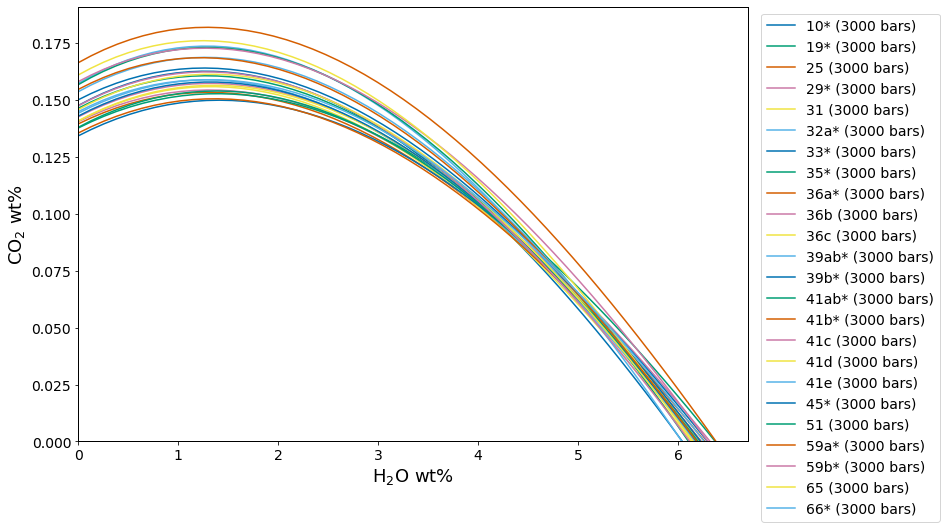

In [30]:
#Plot all isobars from dataset
v.plot(isobars=[isobar for isobar in isobar_list], isobar_labels=[row.name for index, row in basalts.data.iterrows()])

In [6]:
#calculate area under each curve for dataset and "Average Sample"
areas = []
samples = [row.name for index, row in basalts.data.iterrows()]
for isobar in isobar_list:
    x_vals = np.array([row["H2O_liq"] for index, row in isobar.iterrows()])
    y_vals = np.array([row["CO2_liq"] for index, row in isobar.iterrows()])
    area_under_the_curve = scipy.integrate.simps(y_vals, x_vals)
    areas.append(area_under_the_curve)

average_area = scipy.integrate.simps(avg_isobar['CO2_liq'], avg_isobar['H2O_liq'])

In [7]:
#Get maximum and minimum areas from dataset, with corresponding sample names
area_dict = dict(zip(samples, areas))
max_sample = max(area_dict, key=area_dict.get)
min_sample = min(area_dict, key=area_dict.get)
print("ISM values for entire dataset: \n" + str(area_dict) + "\n")
print("'Average Sample' ISM = " + str(average_area))

ISM values for entire dataset: 
{'10*': 0.7022828487672577, '19*': 0.7099145381819657, '25': 0.6857318394996039, '29*': 0.6959251856306994, '31': 0.6857689022034541, '32a*': 0.6981011318157478, '33*': 0.6794449586465339, '35*': 0.6983521150777845, '36a*': 0.6737989655978469, '36b': 0.700302346052726, '36c': 0.6967336243009435, '39ab*': 0.7498555237770486, '39b*': 0.7254222567296, '41ab*': 0.7551972181770662, '41b*': 0.8234964405556267, '41c': 0.7722060723325022, '41d': 0.7707791453257323, '41e': 0.741450834665261, '45*': 0.698941172320567, '51': 0.6872170715015408, '59a*': 0.7393347437150143, '59b*': 0.7091201176739889, '65': 0.7108222436244777, '66*': 0.710577511593821}

'Average Sample' ISM = 0.7160100984580687


In [9]:
#Now, calculate isobars for the max and min samples at multiple pressures
max_isobars, max_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(max_sample), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result
min_isobars, min_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_oxide_comp(min_sample), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result

#Calculate isobars for the average composition
avg_isobars, avg_isopleths = v.calculate_isobars_and_isopleths(sample=avg_dict, temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result

Calculating isobar at 500 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 1000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 2000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 3000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Oflui

In [10]:
#Make dataset with all data except for max and min values
other_data = basalts.data.drop([max_sample, min_sample])

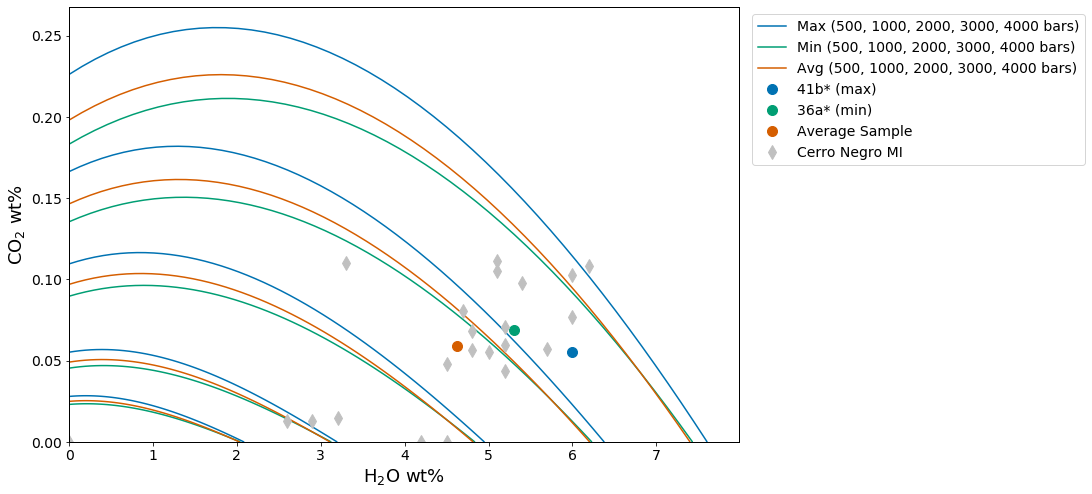

In [29]:
#set up what to pass to v.plot
isobars = [max_isobars, 
           min_isobars, 
           avg_isobars]

isobar_labels = ["Max", 
                 "Min", 
                 "Avg"]

custom_H2O=[basalts.get_sample_oxide_comp(max_sample)["H2O"], 
            basalts.get_sample_oxide_comp(min_sample)["H2O"], 
            avg_dict["H2O"], 
            other_data["H2O"]]

custom_CO2=[basalts.get_sample_oxide_comp(max_sample)["CO2"], 
            basalts.get_sample_oxide_comp(min_sample)["CO2"], 
            avg_dict["CO2"], 
            other_data["CO2"]]

custom_labels = [str(max_sample) + " (max)", 
                 str(min_sample) + " (min)", 
                 "Average Sample", 
                 "Cerro Negro MI"]

custom_colors = [v.color_list[0], 
                 v.color_list[1], 
                 v.color_list[2],
                 'silver']

custom_symbols = ['o',
                  'o',
                  'o',
                  'd']

v.plot(isobars=isobars, isobar_labels=isobar_labels, 
       custom_H2O=custom_H2O, 
       custom_CO2=custom_CO2, 
       custom_labels=custom_labels,
       custom_colors=custom_colors,
       custom_symbols=custom_symbols)




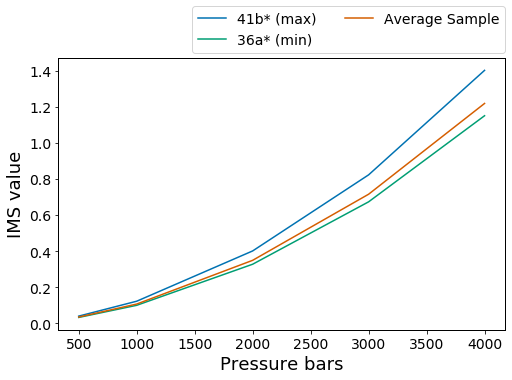

In [12]:
pressure_vals = [500, 1000, 2000, 3000, 4000]

max_IMS_dict = {}
min_IMS_dict = {}
avg_IMS_dict = {}

IMS_dicts = [max_IMS_dict,
            min_IMS_dict,
            avg_IMS_dict]

for i in range(len(isobars)):
    IMS_dicts[i].update({"Pressure": pressure_vals})
    IMS_list = []
    for pressure in pressure_vals:
        IMS_list.append(scipy.integrate.simps(isobars[i].loc[isobars[i]['Pressure']==pressure]["CO2_liq"], isobars[i].loc[isobars[i]['Pressure']==pressure]["H2O_liq"]))
        IMS_dicts[i].update({"IMS": IMS_list})
        
    
labels = ["Maximum, Minimum, Average"]

fig, ax = plt.subplots(1, figsize = (8,5))

for i in range(len(IMS_dicts)):
    ax.plot(IMS_dicts[i]["Pressure"], IMS_dicts[i]["IMS"], label=custom_labels[i])
    ax.set_xlabel("Pressure bars")
    ax.set_ylabel("IMS value")

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

#fig.savefig('Cerro_Negro_img3.pdf')

In [13]:
max_IMS_dict

{'Pressure': [500, 1000, 2000, 3000, 4000],
 'IMS': [0.03964674030557643,
  0.12230513548704117,
  0.4013125282055653,
  0.8234964405556267,
  1.4033476847858979]}

3


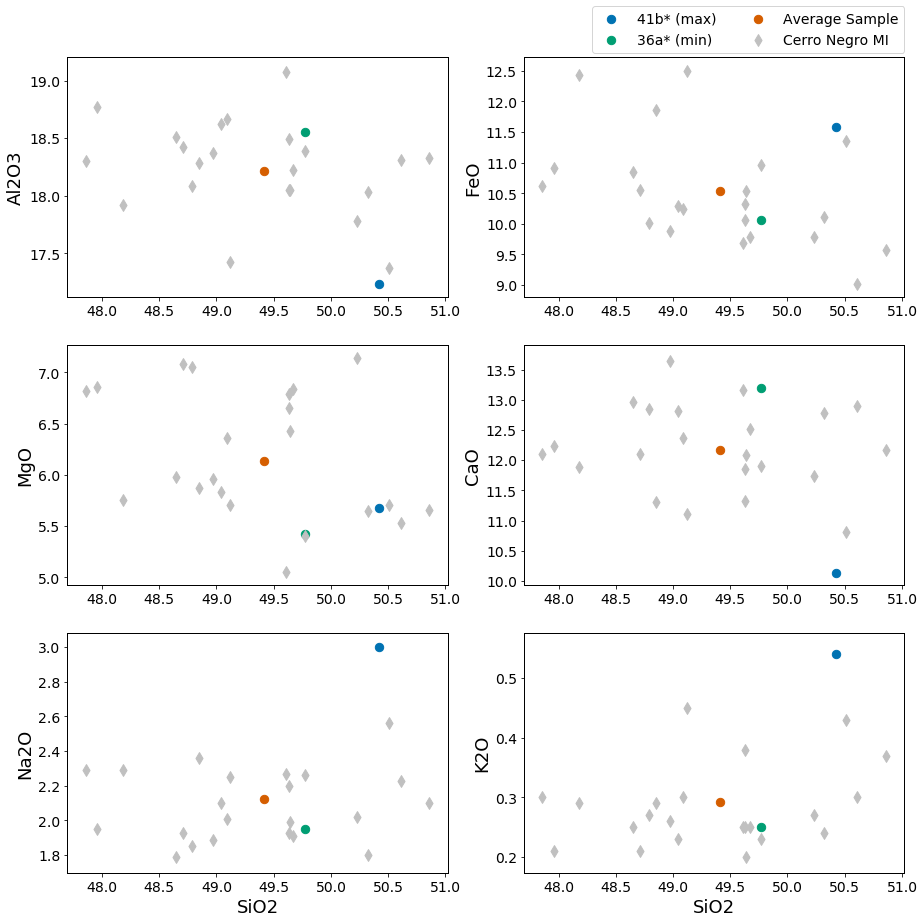

In [14]:
other_oxides = ["Al2O3", "FeO", "MgO", "CaO", "Na2O", "K2O"]
my_samples = [basalts.get_sample_oxide_comp(max_sample),
              basalts.get_sample_oxide_comp(min_sample),
             avg_dict,
             other_data]

fig, axs = plt.subplots(3,2, figsize = (15,15))
print(len(axs))

for j in range(len(my_samples)):
    axs[0][0].scatter(my_samples[j]["SiO2"], my_samples[j]["Al2O3"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0][0].set_ylabel("Al2O3")
    axs[0][1].scatter(my_samples[j]["SiO2"], my_samples[j]["FeO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0][1].set_ylabel("FeO")
    axs[1][0].scatter(my_samples[j]["SiO2"], my_samples[j]["MgO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1][0].set_ylabel("MgO")
    axs[1][1].scatter(my_samples[j]["SiO2"], my_samples[j]["CaO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1][1].set_ylabel("CaO")
    axs[2][0].scatter(my_samples[j]["SiO2"], my_samples[j]["Na2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2][0].set_ylabel("Na2O")
    axs[2][0].set_xlabel("SiO2")
    axs[2][1].scatter(my_samples[j]["SiO2"], my_samples[j]["K2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2][1].set_ylabel("K2O")
    axs[2][1].set_xlabel("SiO2")
    
axs[0][1].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

#fig.savefig('Cerro_Negro_img4.pdf')

# Alternative plots

In [15]:
#Calculate Saturation Pressure for all samples
other_file = v.ExcelFile(filename=None, dataframe=other_data)
satP_other = other_file.calculate_saturation_pressure(temperature=1200)
satP_max = v.calculate_saturation_pressure(sample=basalts.get_sample_oxide_comp(max_sample), temperature=1200, verbose=True).result
satP_min = v.calculate_saturation_pressure(sample=basalts.get_sample_oxide_comp(min_sample), temperature=1200, verbose=True).result
satP_avg = v.calculate_saturation_pressure(sample=avg_dict, temperature=1200, verbose=True).result

Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample 29*
Calculating sample 31
Calculating sample 32a*
Calculating sample 33*
Calculating sample 35*
Calculating sample 36b
Calculating sample 36c
Calculating sample 39ab*
Calculating sample 39b*
Calculating sample 41ab*
Calculating sample 41c
Calculating sample 41d
Calculating sample 41e
Calculating sample 45*
Calculating sample 51
Calculating sample 59a*
Calculating sample 59b*
Calculating sample 65
Calculating sample 66*
Done!


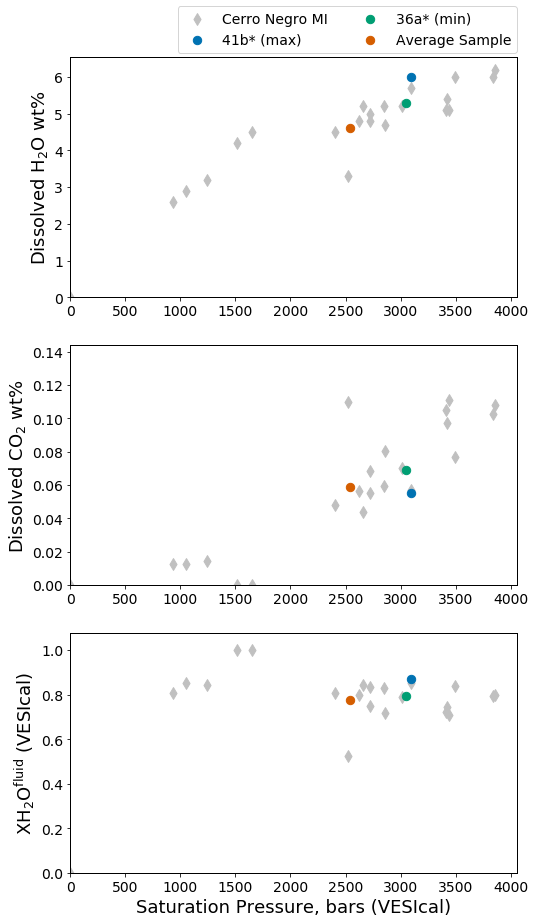

In [16]:
#Create alternative plots using Matplotlib
single_data = [satP_max,
               satP_min,
               satP_avg]

single_samples = [basalts.get_sample_oxide_comp(max_sample),
                 basalts.get_sample_oxide_comp(min_sample),
                 avg_dict]

fig, axs = plt.subplots(3, figsize = (8,15))
axs[0].scatter(satP_other["SaturationP_bars_VESIcal"], satP_other["H2O"], marker=custom_symbols[3], s=70, color=custom_colors[3], label=custom_labels[3])
axs[1].scatter(satP_other["SaturationP_bars_VESIcal"], satP_other["CO2"], marker=custom_symbols[3], s=70, color=custom_colors[3], label=custom_labels[3])
axs[2].scatter(satP_other["SaturationP_bars_VESIcal"], satP_other["XH2O_fl_VESIcal"], marker=custom_symbols[3], s=70, color=custom_colors[3], label=custom_labels[3])

for j in range(len(single_data)):
    axs[0].scatter(single_data[j]["SaturationP_bars"], single_samples[j]["H2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0].set_ylabel("Dissolved H$_2$O wt%")
    axs[0].set_ylim(0)
    axs[0].set_xlim(0)
    axs[1].scatter(single_data[j]["SaturationP_bars"], single_samples[j]["CO2"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1].set_ylabel("Dissolved CO$_2$ wt%")
    axs[1].set_ylim(0)
    axs[1].set_xlim(0)
    axs[2].scatter(single_data[j]["SaturationP_bars"], single_data[j]["XH2O_fl"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2].set_ylabel("XH$_2$O$^{fluid}$ (VESIcal)")
    axs[2].set_ylim(0)
    axs[2].set_xlabel("Saturation Pressure, bars (VESIcal)")
    axs[2].set_xlim(0)

axs[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

#fig.savefig('Cerro_Negro_img5.pdf')

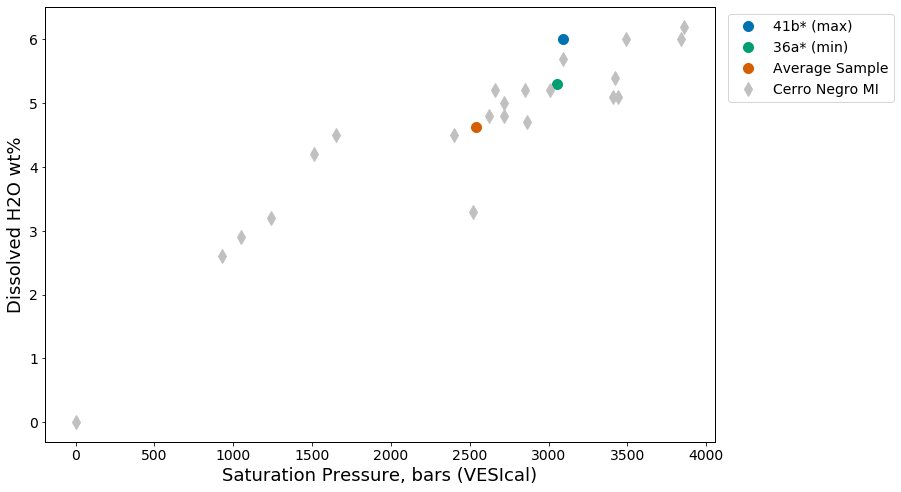

In [17]:
#Create alternative plots using VESIcal's scatterplot() function
single_samples = [basalts.get_sample_oxide_comp(max_sample),
                 basalts.get_sample_oxide_comp(min_sample),
                 avg_dict]

v.scatterplot(custom_x=[satP_max['SaturationP_bars'],
                        satP_min['SaturationP_bars'],
                        satP_avg['SaturationP_bars'],
                       satP_other['SaturationP_bars_VESIcal']],
              custom_y=[single_samples[0]['H2O'],
                        single_samples[1]['H2O'],
                        single_samples[2]['H2O'],
                       satP_other['H2O']],
             custom_symbols=custom_symbols,
             custom_colors=custom_colors,
             custom_labels=custom_labels,
             xlabel="Saturation Pressure, bars (VESIcal)",
             ylabel="Dissolved H2O wt%")

# Calculate saturation pressures for each composition

Here we calculate the saturation pressures of each melt inclusion using: a) the composition of the melt inclusion; b) the composition of the "minimum" melt inclusion (36a*); c) the composition of the "maximum" melt inclusion (41b*); and d) the composition of the "average" melt inclusion as calculated above.

In [19]:
satP_data_orig = v.ExcelFile('cerro_negro_satP_compare.xlsx')
satP_data_min = v.ExcelFile('cerro_negro_satP_compare.xlsx', sheet_name='min')
satP_data_max = v.ExcelFile('cerro_negro_satP_compare.xlsx', sheet_name='max')
satP_data_avg = v.ExcelFile('cerro_negro_satP_compare.xlsx', sheet_name='avg')

In [20]:
satP_orig = satP_data_orig.calculate_saturation_pressure(temperature=1200, print_status=False)
satP_min = satP_data_min.calculate_saturation_pressure(temperature=1200, print_status=False)
satP_max = satP_data_max.calculate_saturation_pressure(temperature=1200, print_status=False)
satP_avg = satP_data_avg.calculate_saturation_pressure(temperature=1200, print_status=False)

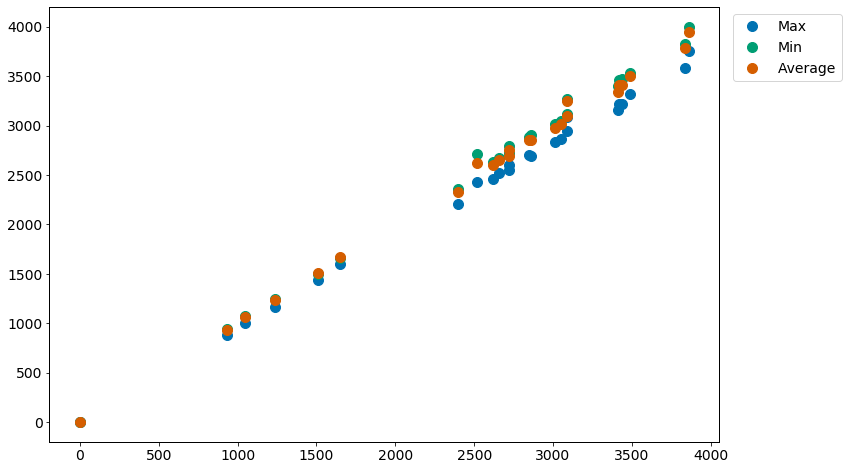

In [21]:
v.scatterplot(custom_x=[satP_orig["SaturationP_bars_VESIcal"], satP_orig["SaturationP_bars_VESIcal"], satP_orig["SaturationP_bars_VESIcal"]],
              custom_y=[satP_max["SaturationP_bars_VESIcal"], satP_min["SaturationP_bars_VESIcal"], satP_avg["SaturationP_bars_VESIcal"]],
              custom_labels=["Max", "Min", "Average"])

In [28]:
f = 100*(satP_min["SaturationP_bars_VESIcal"] - satP_max["SaturationP_bars_VESIcal"])/satP_max["SaturationP_bars_VESIcal"]
fmean = f.dropna().mean()
print(fmean)

print(satP_min["SaturationP_bars_VESIcal"])
print(satP_max["SaturationP_bars_VESIcal"])
print(satP_avg["SaturationP_bars_VESIcal"])

6.785437703427779
10*      2360
19*      3470
25       2670
29*      2900
31       3400
32a*     3820
33*      3460
35*      2790
36a*     3050
36b       940
36c      1240
39ab*    2720
39b*     3120
41ab*    2880
41b*     3270
41c      4000
41d      2710
41e      3530
45*      1500
51       3020
59a*     1070
59b*        0
65       2630
66*      1660
Name: SaturationP_bars_VESIcal, dtype: int64
10*      2210
19*      3220
25       2520
29*      2690
31       3160
32a*     3580
33*      3220
35*      2600
36a*     2860
36b       880
36c      1160
39ab*    2550
39b*     2940
41ab*    2700
41b*     3090
41c      3750
41d      2430
41e      3320
45*      1440
51       2830
59a*     1000
59b*        0
65       2460
66*      1600
Name: SaturationP_bars_VESIcal, dtype: int64
10*      2330
19*      3410
25       2650
29*      2850
31       3340
32a*     3780
33*      3410
35*      2750
36a*     3020
36b       930
36c      1230
39ab*    2690
39b*     3100
41ab*    2850
41b*     3250
41c      3